# EDA com o dataset ***State of Data Brazil 2021***
Let's Code 850 / Python e Dados  
Projeto do Módulo IV - Técnicas de Programação II

### Equipe
* Carolina Sousa Cecilio Vieira
* Farley Salomão Filho
* José Rafael Souza do Nascimento
* Rodrigo Minoru Hayakawa Tanaka

## Sobre o dataset
***State of Data Brazil*** foi uma iniciativa realizada pela comunidade Data Hackers, com o objetivo de entender o panomara do mercado de trabalho brasileiro na área de dados ([*hotsite*](https://www.stateofdata.com.br/) e [*link* do dataset no Kaggle](https://www.kaggle.com/datasets/datahackers/state-of-data-2021)).
A coleta dos dados foi realizada no período de 18 de outubro de 2021 e 6 de dezembro de 2021, por meio de um questionário *online*, reunindo indicadores relacionados a perfil demográfico, formação, atuação no setor, remuneração, rotatividade e fatores de satisfação no ambiente de trabalho, incluindo o impacto do trabalho remoto nas preferências profissionais de 2.645 respondentes de todo o Brasil.


O dataset disponibilizado consiste de um arquivo formato .csv com 2645 linhas e 356 colunas. Dessas colunas, algumas se referem às diferentes respostas de uma mesma pergunta, nos casos em que esta admite respostas multi-valoradas.

O questionário foi dividido em 9 partes temáticas:
* Parte 1 - Dados demográficos
* Parte 2 - Dados sobre carreira
* Parte 3 - Desafios dos gestores de times de dados
* Parte 4 - Conhecimentos na área de dados
* Parte 5 - Objetivos na área de dados
* Parte 6 - Conhecimentos em Engenharia de Dados/DE
* Parte 7 - Conhecimentos em Análise de Dados/DA
* Parte 8 - Conhecimentos em Ciências de Dados/DS
* Parte 9 - Sobre a comunidade **Data Hackers**

### Temas selecionados para este projeto
01. Caracterização do profissional de dados (perfil demográfico, instrução)
02. Caracterização do trabalho do profissional de dados (atividades, linguagens)
03. Perfil salarial do profissional de dados ()

### Observações quanto aos dados utilizados
- **Limitações da validação estatística da pesquisa** A coleta de dados foi feita por meio de questionários de internet, dessa forma o conjunto de respondentes não configura uma amostra que represente o mercado.
- **O dataset quase não apresenta variáveis quantitativas** A única variável quantitativa do dataset é a idade, dessa forma a dificuldade inicial na elaboração de gráficos de cruzamento de variáveis quantitativas teve de ser superada com a utilização de variáveis categóricas.

### *Missing values* e tratamentos necessários
- O dataset em geral não apresenta inconsistências nos dados, o que reduz a necessidade de limpeza e facilita a manipulação.
- Os nomes das colunas no dataset original é composto de tuplas que compreendem um código de identificação da coluna e a sua descrição detalhada. Tendo em vista que manipular o data frame com nomes de colunas extensos pode se tornar bastante trabalhoso, é interessante renomear as colunas com apenas o primeiro item da tupla. 
- Para a elaboração

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itertools import product
%matplotlib inline

In [340]:
import plotly.io as pio
pio.templates.default = "plotly"

In [2]:
df = pd.read_csv('./data/State of Data 2021 - Dataset - Pgina1.csv')

C:\Users\minoru\AppData\Local\Temp\ipykernel_68780\1738712287.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/State of Data 2021 - Dataset - Pgina1.csv')


In [3]:
len(df)

2645

In [342]:
#Valores Nan em nível de ensino
df["('P1_h ', 'Nivel de Ensino')"] = df["('P1_h ', 'Nivel de Ensino')"].replace({'Prefiro não informar': None})
#Ajustando coluna de experiência
experience = ['Não tenho experiência na área de dados',
'Menos de 1 ano',
'de 1 a 2 anos',
'de 2 a 3 anos',
'de 4 a 5 anos',
'de 6 a 10 anos',
'Mais de 10 anos']
df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] = pd.Categorical(df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"], ordered=True, categories=experience)
#Ajustando coluna de faixa salarial
df["('P2_h ', 'Faixa salarial')"] = df["('P2_h ', 'Faixa salarial')"].replace({'Menos de R$ 1.000/mês' : "até R$1k",
                                             'de R$ 1.001/mês a R$ 2.000/mês'  : "R$1k-2k",
                                             'de R$ 2.001/mês a R$ 3000/mês'   : "R$2k-3k",
                                             'de R$ 3.001/mês a R$ 4.000/mês'  : "R$3k-4k", 
                                             'de R$ 4.001/mês a R$ 6.000/mês'  : "R$4k-6k",
                                             'de R$ 6.001/mês a R$ 8.000/mês'  : "R$6k-8k",
                                             'de R$ 8.001/mês a R$ 12.000/mês' : "R$8k-12k",
                                             'de R$ 12.001/mês a R$ 16.000/mês' : "R$12k-16k",
                                             'de R$ 16.001/mês a R$ 20.000/mês' : "R$16k-20k",
                                             'de R$ 20.001/mês a R$ 25.000/mês' : "R$20k-25k",
                                             'de R$ 25.001/mês a R$ 30.000/mês' : "R$25k-30k",
                                             'de R$ 30.001/mês a R$ 40.000/mês' : "R$30k-40k",
                                             'Acima de R$ 40.001/mês' : "R$40k+"                                      
                                                    })
salary_range = ["até R$1k",
                     "R$1k-2k",
                     "R$2k-3k",
                     "R$3k-4k", 
                     "R$4k-6k",
                     "R$6k-8k",
                     "R$8k-12k",
                     "R$12k-16k",
                     "R$16k-20k",
                     "R$20k-25k",
                     "R$25k-30k",
                     "R$30k-40k",
                     "R$40k+"]
df["('P2_h ', 'Faixa salarial')"] = pd.Categorical(df["('P2_h ', 'Faixa salarial')"], ordered=True, categories=salary_range)
# Atualizando a variável  "('P2_g ', 'Nivel')" da seguinte forma
# Quando a pessoa respondeu que é gestor "('P2_d ', 'Gestor?')" e não respondeu a pergunta "('P2_g ', 'Nivel')", 
# assume-se que o nível é "Gestor"

df.loc[(df["('P2_d ', 'Gestor?')"] == 1) & (df["('P2_g ', 'Nivel')"].isna()), "('P2_g ', 'Nivel')"] = 'Gestor'

#vinculo empregativo
df["Vínculo Empregativo"]=df["('P2_a ', 'Qual sua situação atual de trabalho?')"].replace({
    'Somente Estudante (graduação)': 'Acadêmica/Pesquisador',
    'Desempregado, buscando recolocação': "Desempregado",
    'Somente Estudante (pós-graduação)': 'Acadêmica/Pesquisador',
    'Trabalho na área Acadêmica/Pesquisador':'Acadêmica/Pesquisador',
    'Desempregado e não estou buscando recolocação': "Desempregado",
    'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)': "Trabalho fora do Brasil",
    'Vivo fora do Brasil e trabalho para empresa de fora do Brasil': "Trabalho fora do Brasil",
    #'Empregado (CLT)', 
    #'Empreendedor ou Empregado (CNPJ)',
    #'Servidor Público', 
    #'Estagiário', 
    #'Freelancer',
    'Prefiro não informar':None
})
df['Vínculo Empregativo'] = [a if b!="Gerente/Head/Diretor/VP" else b if a =="Empreendedor ou Empregado (CNPJ)" else a for a,b in zip(df['Vínculo Empregativo'], df["('P2_e ', 'Cargo como Gestor')"])]
df['Vínculo Empregativo'] = df['Vínculo Empregativo'].replace({'Gerente/Head/Diretor/VP':'Empreendedor (CNPJ)','Empreendedor ou Empregado (CNPJ)':'Empregado (CNPJ)'})

#modelo
df.replace({"Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)": "Híbrido flexível",
            "Modelo híbrido com dias fixos de trabalho presencial": "Híbrido presenciais fixos",
            "Modelo 100% remoto": "Remoto", 
            "Modelo 100% presencial": "Presencial",
       },inplace=True)

In [343]:
columns=df.columns

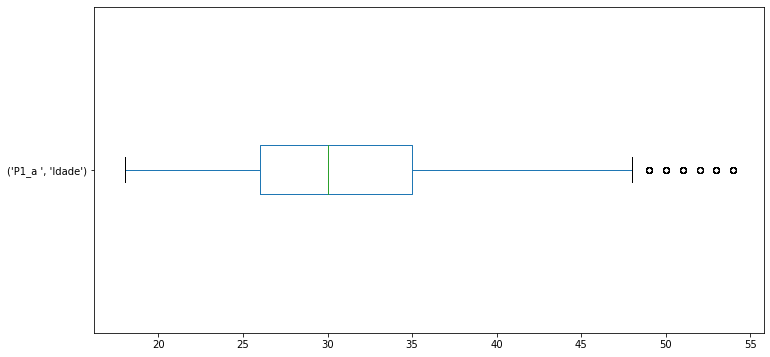

In [344]:
# boxplot idade fizemos em Pandas (Check)
df["('P1_a ', 'Idade')"].plot(kind='box', figsize=(12,6), vert=False);

# FARLEY FAÇA SUA MÁGICA!!!

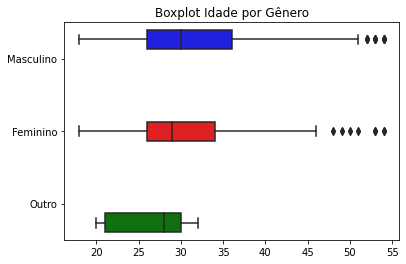

In [345]:
from matplotlib.pyplot import legend

ax = sns.boxplot(data=df, x="('P1_a ', 'Idade')", y="('P1_b ', 'Genero')", hue="('P1_b ', 'Genero')", palette=['blue','red','green'], orient='h')
ax.set(xlabel="",ylabel="",title='Boxplot Idade por Gênero')
plt.legend([],[], frameon=False)

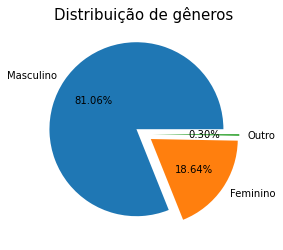

In [346]:
df_genero = df["(\'P1_b \', \'Genero\')"].value_counts().reset_index()
plt.pie("(\'P1_b \', \'Genero\')", data=df_genero, labels = 'index', autopct='%.2f%%', explode = (0.1, 0.1, 0.1))
plt.title('Distribuição de gêneros', fontsize=15)
plt.show()

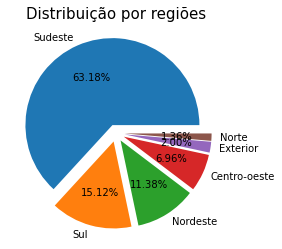

In [347]:
df_regiao = df[ "('P1_e_b ', 'Regiao onde mora')"].value_counts().reset_index()
plt.pie("('P1_e_b ', 'Regiao onde mora')", data=df_regiao, labels = 'index', autopct='%.2f%%', explode = [0.1]*6)
plt.title('Distribuição por regiões', fontsize=15)
plt.show()

In [348]:
'''for col in df_p1.columns:

    df_var= df_a[col].value_counts().reset_index()
    plt.pie(col, data=df_var, labels = 'index', autopct='%.2f%%', explode = [0.08]*df_var.shape[0])
    plt.title('Distribuição de '+str(col), fontsize=15)
    plt.show()
'''

"for col in df_p1.columns:\n\n    df_var= df_a[col].value_counts().reset_index()\n    plt.pie(col, data=df_var, labels = 'index', autopct='%.2f%%', explode = [0.08]*df_var.shape[0])\n    plt.title('Distribuição de '+str(col), fontsize=15)\n    plt.show()\n"

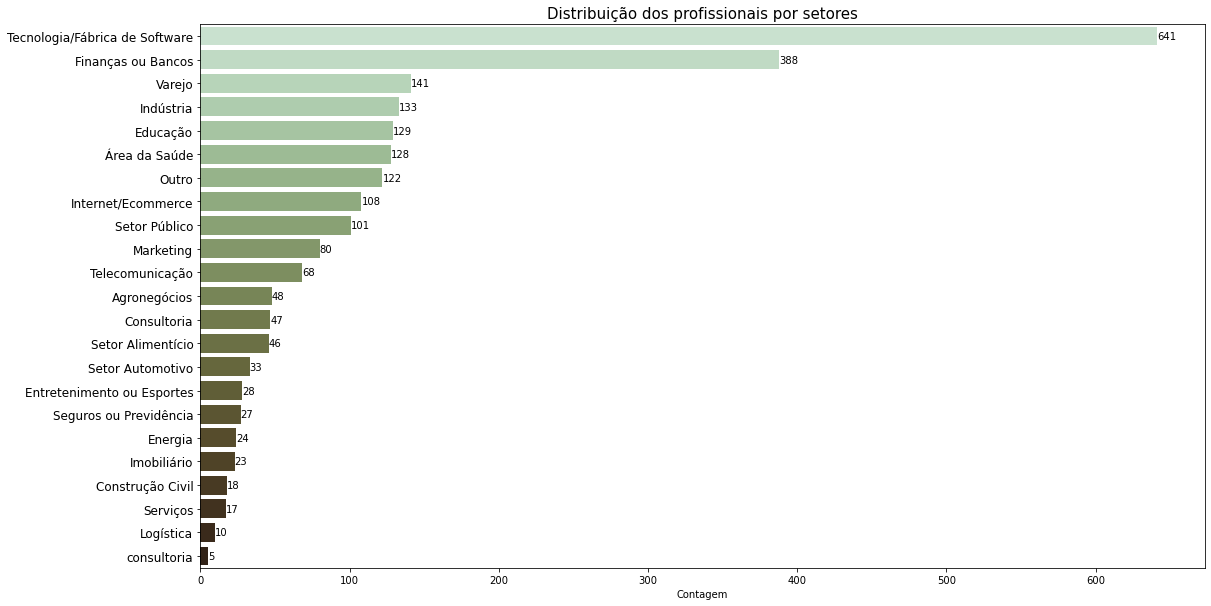

In [349]:
fig = plt.figure(figsize=(18,10))
ax = sns.countplot(data=df, y="('P2_b ', 'Setor')", palette='ch:22', order = df["('P2_b ', 'Setor')"].value_counts().index, orient='h')
ax.bar_label(ax.containers[0])
ax.set(ylabel="",xlabel="Contagem")
ax.set_title('Distribuição dos profissionais por setores', fontsize=15)
ax.set_yticklabels(df["('P2_b ', 'Setor')"].value_counts().index, size = 12)
plt.show()

In [350]:
df_idade = df["('P1_a ', 'Idade')"].dropna().astype('int').reset_index()
# df["('P1_a ', 'Idade')"] = df["('P1_a ', 'Idade')"].astype('int')

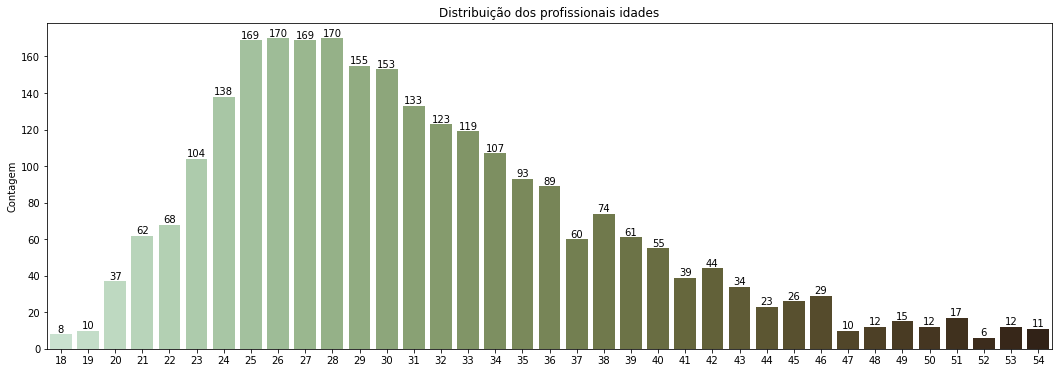

In [351]:
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(data=df_idade, x="('P1_a ', 'Idade')", palette='ch:22')
ax.bar_label(ax.containers[0])
ax.set(xlabel="",ylabel="Contagem",title='Distribuição dos profissionais idades')
plt.show()

Idade 
P1_e_b Região (Pizza) por Salário P2_h *
P2_h Salário (Barra "Histograma") por Região P1_e_b

salário por escolaridade (barra) 

vinculos**

P2_h Salário x Tempo experiência dados P2_i (Linhas)
P2_h Salário x Tempo experiência TI P2_j (Linhas)
P2_h Salário x Linguagem mais utilizada P4_e

tempo de experiência dados histograma

P4_eLinguagem mais utilizada (barras ou pizza)
P4_eLinguagem mais utilizada Tempo experiência dados P2_i

Cientista de Dados
P8_d Atividade q mais gasta o tempo (Pizza)

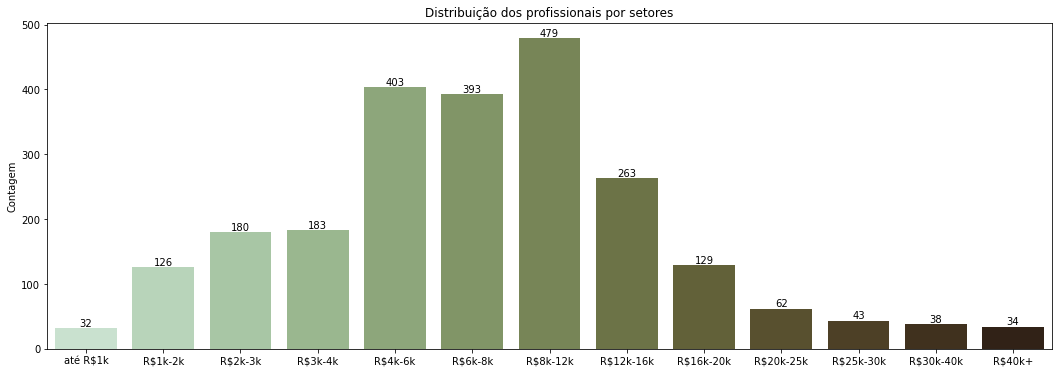

In [352]:
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x="('P2_h ', 'Faixa salarial')", palette='ch:22')
ax.bar_label(ax.containers[0])
ax.set(xlabel="",ylabel="Contagem",title='Distribuição dos profissionais por setores')
#ax.set_yticklabels(df_a["('P2_b ', 'Setor')"].value_counts().index, size = 12)
#plt.xticks(rotation=80)
plt.show()

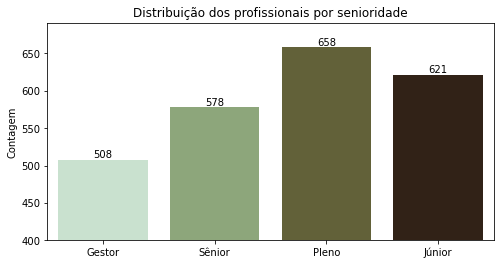

In [353]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x= "('P2_g ', 'Nivel')", palette='ch:22')
ax.bar_label(ax.containers[0])
ax.set(ylabel="Contagem",xlabel="",title='Distribuição dos profissionais por senioridade')
ax.set_ylim(ymin=400)
plt.show()

In [354]:
salary_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df['Vínculo Empregativo'],normalize='columns')*100

fig = px.line(salary_prop, x=salary_prop.index, y=salary_prop.columns, markers=True, title="Proporções de faixas-salariais por tipo vínculo empregativo",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "Vínculo Empregativo": ""
                 }, color_discrete_sequence=px.colors.qualitative.G10)
fig.show()


In [355]:
regiao_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P1_e_b ', 'Regiao onde mora')"],normalize=True)*100
regiao_prop

fig = px.line(regiao_prop, x=regiao_prop.index, y=regiao_prop.columns, markers=True, title="Proporções de faixas-salariais por região",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P1_e_b ', 'Regiao onde mora')": ""
                 }, color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [356]:
sexo_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P1_b ', 'Genero')"],normalize='columns')*100

fig = px.line(sexo_prop.iloc[:,0:2], x=sexo_prop.index, y=sexo_prop.iloc[:,0:2].columns, markers=True, title="Proporções de faixas-salariais por gênero",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P1_b ', 'Genero')": ""
                 }, color_discrete_sequence=['Red','Blue','Black'])
                
fig.show()

In [357]:
nivel_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P2_g ', 'Nivel')"],normalize='columns')*100
nivel_prop

fig = px.line(nivel_prop, x=nivel_prop.index, y=nivel_prop.columns, markers=True,title="Proporções de faixas-salariais por nível de senioridade",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P2_g ', 'Nivel')": ""
                 })
                

fig.show()

In [358]:
experiencia_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"],normalize='columns')*100
experiencia_prop

fig = px.line(experiencia_prop, x=experiencia_prop.index, y=experiencia_prop.columns, markers=True, title="Proporções de faixas-salariais por tempo de experiência em Dados",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": ""
                 }, color_discrete_sequence=px.colors.qualitative.Dark24)
                

fig.show()

In [359]:
df["('P2_r ', 'Qual a forma de trabalho ideal para você?')"].replace({np.nan:"ignore"},inplace=True)
df["('P2_r ', 'Qual a forma de trabalho ideal para você?')"].unique()

array(['Híbrido presenciais fixos', 'Remoto', 'Híbrido flexível',
       'Presencial', 'ignore'], dtype=object)

In [360]:
fig = px.sunburst(df[df["('P2_r ', 'Qual a forma de trabalho ideal para você?')"]!="ignore"], path=["('P2_q ', 'Atualmente qual a sua forma de trabalho?')", "('P2_r ', 'Qual a forma de trabalho ideal para você?')"])
fig.update_traces(textinfo="percent entry+label")
fig.show()

In [361]:
df["('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')"].value_counts()

SQL, Python                                    510
Python, SQL                                    166
SQL                                            158
Não utilizo nenhuma das linguagens listadas    155
Python                                          96
                                              ... 
Python, SQL, Julia                               1
SQL, R, Python, SAS/Stata, Matlab                1
SQL, R, Python, Java                             1
SAS/Stata, Java                                  1
Python, SQL, Java, JavaScript                    1
Name: ('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?'), Length: 221, dtype: int64

In [362]:
df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts()

Python                                         736
SQL                                            731
Não utilizo nenhuma das linguagens listadas    166
R                                               81
Visual Basic/VBA                                46
JavaScript                                      22
Scala                                           19
SAS/Stata                                       18
C/C++/C#                                        13
Java                                            12
PHP                                              8
.NET                                             4
Matlab                                           1
Name: ('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?'), dtype: int64

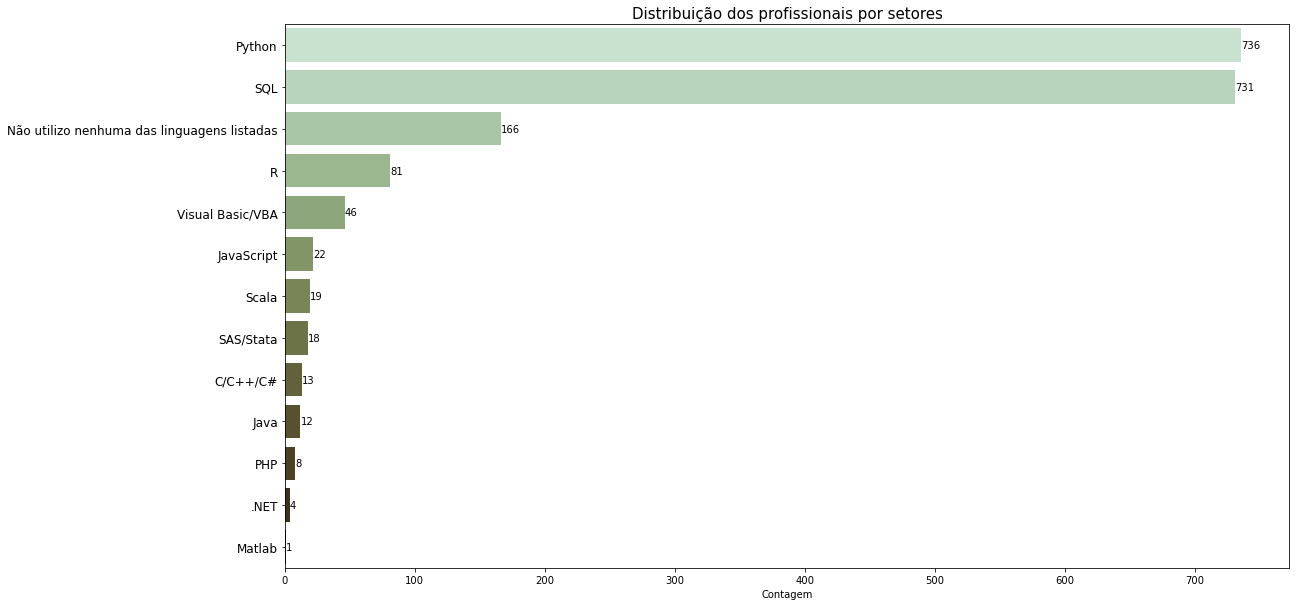

In [363]:
fig = plt.figure(figsize=(18,10))
ax = sns.countplot(data=df, y="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')", palette='ch:22', order = df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts().index, orient='h')
ax.bar_label(ax.containers[0])
ax.set(ylabel="",xlabel="Contagem")
ax.set_title('Distribuição dos profissionais por setores', fontsize=15)
ax.set_yticklabels(df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts().index, size = 12)
plt.show()

In [364]:
list(columns)

["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_a ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_e ', 'Estado onde mora')",
 "('P1_e_a ', 'uf onde mora')",
 "('P1_e_b ', 'Regiao onde mora')",
 "('P1_g_b ', 'Regiao de origem')",
 "('P1_g_c ', 'Mudou de Estado?')",
 "('P1_h ', 'Nivel de Ensino')",
 "('P1_i ', 'Área de Formação')",
 "('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_b ', 'Setor')",
 "('P2_c ', 'Numero de Funcionarios')",
 "('P2_d ', 'Gestor?')",
 "('P2_e ', 'Cargo como Gestor')",
 "('P2_f ', 'Cargo Atual')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
 "('P2_k ', 'Você está satisfeito na sua empresa atual?')",
 "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')",
 "('P2_l_a ', 'Falta de oportunidade de cresciment

In [365]:
df_ling = [c for c in df.columns if "('P4_d_" in c]
df_ling

["('P4_d_a ', 'SQL')",
 "('P4_d_b ', 'R ')",
 "('P4_d_c ', 'Python')",
 "('P4_d_d ', 'C/C++/C#')",
 "('P4_d_e ', '.NET')",
 "('P4_d_f ', 'Java')",
 "('P4_d_g ', 'Julia')",
 "('P4_d_h ', 'SAS/Stata')",
 "('P4_d_i ', 'Visual Basic/VBA')",
 "('P4_d_j ', 'Scala')",
 "('P4_d_k ', 'Matlab')",
 "('P4_d_l ', 'PHP')",
 "('P4_d_m ', 'Javascript')",
 "('P4_d_n ', 'Não utilizo nenhuma linguagem')"]

In [366]:
"('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')",
"('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')",
"('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')",

("('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')",)

In [367]:
df['engenheiro'] = [1 if a.lower() != 'nan' else 0 for a in df["('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"].astype('str')]
df['analista'] = [1 if a != 'nan' else 0 for a in df["('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')"].astype('str')]
df['cientista'] = [1 if a != 'nan' else 0 for a in df["('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"].astype('str')]

In [368]:
engenheiro="('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"
analista="('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')"
cientista="('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')"

df[engenheiro].fillna(np.nan,inplace=True)
df[analista].fillna(np.nan,inplace=True)
df[cientista].fillna(np.nan,inplace=True)
df['profissao'] = ["Engenheiro Dados" if str(a)!="nan" else "Analista Dados" if str(b) !="nan" else "Cientista Dados" if str(c)!="nan" else np.nan for a,b,c in zip(df[engenheiro], df[analista],df[cientista])]

In [369]:
df.shape[0]  - df['profissao'].value_counts().sum()

980

In [370]:
list(columns)

["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_a ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_e ', 'Estado onde mora')",
 "('P1_e_a ', 'uf onde mora')",
 "('P1_e_b ', 'Regiao onde mora')",
 "('P1_g_b ', 'Regiao de origem')",
 "('P1_g_c ', 'Mudou de Estado?')",
 "('P1_h ', 'Nivel de Ensino')",
 "('P1_i ', 'Área de Formação')",
 "('P2_a ', 'Qual sua situação atual de trabalho?')",
 "('P2_b ', 'Setor')",
 "('P2_c ', 'Numero de Funcionarios')",
 "('P2_d ', 'Gestor?')",
 "('P2_e ', 'Cargo como Gestor')",
 "('P2_f ', 'Cargo Atual')",
 "('P2_g ', 'Nivel')",
 "('P2_h ', 'Faixa salarial')",
 "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
 "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
 "('P2_k ', 'Você está satisfeito na sua empresa atual?')",
 "('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')",
 "('P2_l_a ', 'Falta de oportunidade de cresciment

In [371]:
nivel_sal = df.pivot_table(index=["('P2_h ', 'Faixa salarial')","('P2_g ', 'Nivel')"], values="('P0', 'id')", aggfunc='count').reset_index()

In [372]:
nivel_sal

,"('P2_h ', 'Faixa salarial')","('P2_g ', 'Nivel')","('P0', 'id')"
0,até R$1k,Gestor,8
1,até R$1k,Júnior,22
2,até R$1k,Pleno,2
3,até R$1k,Sênior,0
4,R$1k-2k,Gestor,4
5,R$1k-2k,Júnior,112
6,R$1k-2k,Pleno,9
7,R$1k-2k,Sênior,1
8,R$2k-3k,Gestor,7
9,R$2k-3k,Júnior,139


In [373]:
fig =px.histogram(nivel_sal, y="('P0', 'id')",barnorm='percent',color="('P2_h ', 'Faixa salarial')", x="('P2_g ', 'Nivel')", color_discrete_sequence= px.colors.sequential.Turbo,labels={"salario":"","profissao":"Profissão"},text_auto='.0f')
fig.update_layout(title={"text": "Distribuição do Salário por Profissão", "x": 0.5}, yaxis_title="Percent")
fig.update_traces(marker_line_width=0)
fig.show()

In [374]:
prof_sal_cross = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df['profissao'],normalize='columns')*100
prof_sal_cross = prof_sal_cross.reset_index()
prof_sal_cross_melt = prof_sal_cross.melt(id_vars="('P2_h ', 'Faixa salarial')")
prof_sal_cross_melt["salario"] = prof_sal_cross_melt["('P2_h ', 'Faixa salarial')"]
#.replace({'até R$1k':' < R$2k', 'R$1k-2k':' < R$2k', 'R$25k-30k': 'R$20k+', 'R$40k+':'R$20k+',  'R$30k-40k':'R$20k+', 'R$20k-25k':'R$20k+'})

In [375]:
prof_sal_cross_melt["salario"] = prof_sal_cross_melt["('P2_h ', 'Faixa salarial')"].replace({'até R$1k':' < R$2k', 'R$1k-2k':' < R$2k', 'R$25k-30k': 'R$20k+', 'R$40k+':'R$20k+',  'R$30k-40k':'R$20k+', 'R$20k-25k':'R$20k+'})

In [376]:
fig =px.histogram(prof_sal_cross_melt, y='value',barnorm='percent',color="salario", x='profissao', color_discrete_sequence= px.colors.sequential.Turbo,labels={"salario":"","profissao":"Profissão"},text_auto='.0f')
fig.update_layout(title={"text": "Distribuição do Salário por Profissão", "x": 0.5}, yaxis_title="Percent")
fig.update_traces(marker_line_width=0)
fig.show()

In [377]:
salary_range = [' < R$2k',
                     "R$2k-3k",
                     "R$3k-4k", 
                     "R$4k-6k",
                     "R$6k-8k",
                     "R$8k-12k",
                     "R$12k-16k",
                     "R$16k-20k",
                    'R$20k+'
]
prof_sal_cross_melt["salario"] = pd.Categorical(prof_sal_cross_melt["salario"], ordered=True, categories=salary_range)

In [378]:
prof_lang_cross = pd.crosstab(df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"],df['profissao'],normalize='columns')*100
prof_lang_cross = prof_lang_cross.reset_index()
prof_lang_cross_melt = prof_lang_cross.melt(id_vars="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')")
prof_lang_cross_melt

,"('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')",profissao,value
0,.NET,Analista Dados,0.000000
1,C/C++/C#,Analista Dados,0.235571
2,Java,Analista Dados,0.000000
3,JavaScript,Analista Dados,0.824499
4,Matlab,Analista Dados,0.000000
5,Não utilizo nenhuma das linguagens listadas,Analista Dados,11.189635
6,PHP,Analista Dados,0.235571
7,Python,Analista Dados,20.848057
8,R,Analista Dados,4.946996
9,SAS/Stata,Analista Dados,1.177856


In [379]:
df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts()

Python                                         736
SQL                                            731
Não utilizo nenhuma das linguagens listadas    166
R                                               81
Visual Basic/VBA                                46
JavaScript                                      22
Scala                                           19
SAS/Stata                                       18
C/C++/C#                                        13
Java                                            12
PHP                                              8
.NET                                             4
Matlab                                           1
Name: ('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?'), dtype: int64

In [380]:
prof_lang_cross_melt["linguagens"] = prof_lang_cross_melt["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].replace({'Matlab':'Outros', '.NET':'Outros', 'PHP':'Outros'})

In [381]:
fig =px.histogram(prof_lang_cross_melt, y='value',barnorm='percent',color="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')", x='profissao', color_discrete_sequence= px.colors.sequential.Turbo,labels={"('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')":"","profissao":"Profissão"},text_auto='.0f')
fig.update_layout(title={"text": "Linguagens mais utilizadas por profissão", "x": 0.5}, yaxis_title="Percent")
fig.update_traces(marker_line_width=0)
fig.show()

In [382]:
ad_hoc="Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio."
df["AdHoc"]=[1 if ad_hoc in str(a) else 0 for a in df["(\'P8_d \', \'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?\')"]]
colunas_p8 =["AdHoc"]+[x for x in df.columns if "('P8_d_" in x] +["('P2_g ', 'Nivel')"]
df_atividades =  df[colunas_p8].groupby("('P2_g ', 'Nivel')").sum().reset_index()
df_atividade_melt = df_atividades.melt(id_vars="('P2_g ', 'Nivel')")
df_atividade_melt_sg = df_atividade_melt[df_atividade_melt["('P2_g ', 'Nivel')"] != 'Gestor']
df_atividade_melt_sg["variable"]=df_atividade_melt_sg["variable"].replace({"('P8_d_a ', 'Coletando e limpando os dados que uso para análise e modelagem.')": "Coleta e limpeza de dados",
"('P8_d_b ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')": "Contato com os times de negócio",
"('P8_d_c ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')": "Desenvolvimento de modelos de ML",
"('P8_d_d ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')": "Colocação de modelos em produção, criação de pipelines de dados",
"('P8_d_e ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')": "Manutenção de modelos de ML",
"('P8_d_f ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')": "Construção de dashboards / ferramentas de BI",
"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')": "Manutenção em ETLs, DAGs e automações",
"('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')": "Soluções de Feature Store, Cultura MLOps",
"('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')": "Infra: clusters, servidores, API, containers",
"AdHoc": "Ad-hoc de confirmação hipóteses, modelos preditivos e responder áreas de negócio"})

<ipython-input-382-d18319f3a63d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [383]:
colunas_p8 =[x for x in df.columns if "('P8_d_" in x] + ["('P2_g ', 'Nivel')"]
df[colunas_p8]

prof_lang_cross = pd.crosstab(df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"],df['profissao'],normalize='columns')*100
prof_lang_cross = prof_lang_cross.reset_index()
#prof_lang_cross_melt = prof_lang_cross.melt(id_vars="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')")
#prof_lang_cross_melt

In [384]:
df_atividades =  df[colunas_p8].groupby("('P2_g ', 'Nivel')").sum().reset_index()

In [385]:
df_atividade_melt = df_atividades.melt(id_vars="('P2_g ', 'Nivel')")

In [386]:
df_atividade_melt_sg = df_atividade_melt[df_atividade_melt["('P2_g ', 'Nivel')"] != 'Gestor']

In [387]:
df_atividade_melt_sg

,"('P2_g ', 'Nivel')",variable,value
1,Júnior,"('P8_d_a ', 'Coletando e limpando os dados que...",67.0
2,Pleno,"('P8_d_a ', 'Coletando e limpando os dados que...",83.0
3,Sênior,"('P8_d_a ', 'Coletando e limpando os dados que...",56.0
5,Júnior,"('P8_d_b ', 'Entrando em contato com os times ...",19.0
6,Pleno,"('P8_d_b ', 'Entrando em contato com os times ...",43.0
7,Sênior,"('P8_d_b ', 'Entrando em contato com os times ...",34.0
9,Júnior,"('P8_d_c ', 'Desenvolvendo modelos de Machine ...",43.0
10,Pleno,"('P8_d_c ', 'Desenvolvendo modelos de Machine ...",53.0
11,Sênior,"('P8_d_c ', 'Desenvolvendo modelos de Machine ...",43.0
13,Júnior,"('P8_d_d ', 'Colocando modelos em produção, cr...",6.0


In [388]:
df_atividade_melt_sg["variable"]=df_atividade_melt_sg["variable"].replace({"('P8_d_a ', 'Coletando e limpando os dados que uso para análise e modelagem.')": "Coleta e limpeza de dados",
"('P8_d_b ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')": "Contato com os times de negócio",
"('P8_d_c ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')": "Desenvolvimento de modelos de ML",
"('P8_d_d ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')": "Colocação de modelos em produção, criação de pipelines de dados",
"('P8_d_e ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')": "Manutenção de modelos de ML",
"('P8_d_f ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')": "Construção de dashboards / ferramentas de BI",
"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')": "Manutenção em ETLs, DAGs e automações",
"('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')": "Soluções de Feature Store, Cultura MLOps",
"('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')": "Infra: clusters, servidores, API, containers",
"AdHoc": "Ad-hoc de confirmação hipóteses, modelos preditivos e responder áreas de negócio"})

<ipython-input-388-7d705c0b81b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [389]:
fig =px.histogram(df_atividade_melt_sg, y='value', color="variable", x="('P2_g ', 'Nivel')",barnorm='percent',text_auto='.0f', color_discrete_sequence= px.colors.sequential.Turbo, barmode='relative',labels={"variable":"","('P2_g ', 'Nivel')":"Nível"})
fig.update_layout(title={"text": "Atividade em que se gasta mais tempo", "x": 0.5}, yaxis_title="Percent")
fig.show()

In [390]:
colunas_p8_a =[x for x in df.columns if "('P8_a_" in x] + ["('P2_g ', 'Nivel')"]
df_atividades_b = df[colunas_p8_a].groupby("('P2_g ', 'Nivel')").sum().reset_index()
atv = df[colunas_p8_a].sum().reset_index()
dict_replace_atv = {"('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')":"Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.",
       "('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')":"Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.",
       "('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')":"Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",
       "('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')":"Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).",
       "('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')":"Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.",
       "('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')":"Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.",
       "('P8_a_g ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')":"Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')",
       "('P8_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')":"Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.",
       "('P8_a_j ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')":"Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc."}
atv['index']=atv['index'].replace(dict_replace_atv)
atv['x'] = 'x'

In [393]:
fig =px.histogram(atv, y='x', color="index", x=0, barnorm='percent',text_auto='.01f', color_discrete_sequence= px.colors.sequential.Turbo, barmode='relative',labels={"index":"",}, height=550)
fig.update_layout(title={"text": "Atividades que compõe a rotina de trabalho do cientista de dado", "x": 0.5}, xaxis_title="%")
#fig.update_traces(width=30)
fig.update_layout(legend_orientation='h')

fig.show()